In [35]:
import os 
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns


### Step_1: Converting Bussines Problem into DataScience Prob
            

* Prob: How to increase yearly Amount Spent by Consumers

In [36]:
os.chdir(r"D:\Reshmi\ML\Linear Regression")

In [37]:
os.listdir()

['car data.csv',
 'car_done.csv',
 'corr.xlsx',
 'Ecommerce.xlsx',
 'E_commerce (1).ipynb',
 'kc_house_data.csv',
 'Linear Reg with SGD.ipynb',
 'LinearRegressionCarSales.ipynb',
 'Loan Aarushi ML.ipynb',
 'LoansData.csv',
 'MLModel_CarData.ipynb',
 'outliers.xlsx',
 'RealEstate_California.csv',
 'RealEstate_LR.ipynb',
 'sgdregressor.joblib',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb']

In [38]:
df1=pd.read_excel('Ecommerce.xlsx')

### Step_2: Data Collection

#### Original DataFrame

In [39]:
df1

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,835 Frank Tunnel,NaN,NaN,NaN,NaN,NaN,NaN
1,Wrightmouth,"MI 82180-9605""",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
2,hduke@hotmail.com,4547 Archer Common,NaN,NaN,NaN,NaN,NaN,NaN
3,Diazchester,"CA 06566-8576""",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
4,pallen@yahoo.com,24645 Valerie Unions Suite 582,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
995,South Chadburgh,"TN 56128""",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
996,cwilson@hotmail.com,680 Jennifer Lodge Apt. 808,NaN,NaN,NaN,NaN,NaN,NaN
997,Brendachester,"TX 05000-5873""",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
998,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898,NaN,NaN,NaN,NaN,NaN,NaN


### Step_3: Feature Engineering/EDA

#### A.Univariate Analysis

There are no Categorical variable 

Numerical Variables:{Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent}

#### B. BiVariate Analysis

#### C. Missing Values

In [40]:
df1.isnull().sum()

Email                     0
Address                   0
Avatar                  500
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     546
dtype: int64

In [41]:
df=df1.dropna()

In [42]:
df.drop(columns=['Email','Address','Avatar'],inplace=True) # droping the unnecesarry columns

C:\Users\Reshmi\AppData\Local\Temp\ipykernel_22444\1373123939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Email','Address','Avatar'],inplace=True) # droping the unnecesarry columns


In [43]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
1,34.497268,12.655651,39.577668,4.082621,587.951054
3,31.926272,11.109461,37.268959,2.664034,392.204933
5,33.000915,11.330278,37.110597,4.104543,487.547505
7,34.305557,13.717514,36.721283,3.120179,581.852344
9,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
991,33.237660,13.566160,36.417985,3.746573,573.847438
993,34.702529,11.695736,37.190268,3.576526,529.049004
995,32.646777,11.499409,38.332576,4.958264,551.620145
997,33.322501,12.391423,36.840086,2.336485,456.469510


#### D. Outliers

##### D.1  Checking 

In [44]:
df[['Avg. Session Length','Time on App','Time on Website']].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,96%,97%,98%,99%,max
Avg. Session Length,454.0,33.052615,0.997603,29.532429,31.823092,32.199569,32.490728,32.751986,33.082008,33.366880,33.590834,33.894598,34.342364,34.599440,34.701696,34.764301,34.965690,35.479103,36.139662
Time on App,454.0,12.041631,0.979870,8.508152,10.860207,11.200560,11.545731,11.764350,11.966439,12.274146,12.580060,12.931177,13.317878,13.669786,13.727886,13.891706,14.036851,14.252486,15.126994
Time on Website,454.0,37.052822,0.997863,34.476878,35.769836,36.166295,36.545422,36.838799,37.063155,37.303178,37.578971,37.855646,38.327498,38.765818,38.875401,38.969215,39.093843,39.272254,40.005182


In [45]:
df.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,96%,97%,98%,99%,max
Avg. Session Length,454.0,33.052615,0.997603,29.532429,31.823092,32.199569,32.490728,32.751986,33.082008,33.366880,33.590834,33.894598,34.342364,34.599440,34.701696,34.764301,34.965690,35.479103,36.139662
Time on App,454.0,12.041631,0.979870,8.508152,10.860207,11.200560,11.545731,11.764350,11.966439,12.274146,12.580060,12.931177,13.317878,13.669786,13.727886,13.891706,14.036851,14.252486,15.126994
Time on Website,454.0,37.052822,0.997863,34.476878,35.769836,36.166295,36.545422,36.838799,37.063155,37.303178,37.578971,37.855646,38.327498,38.765818,38.875401,38.969215,39.093843,39.272254,40.005182
Length of Membership,454.0,3.546803,0.992032,0.269901,2.325331,2.787262,3.088521,3.345641,3.534332,3.800552,4.027978,4.350222,4.786133,5.094822,5.307197,5.408257,5.484568,5.769186,6.401229
Yearly Amount Spent,454.0,499.919858,78.325793,266.086341,404.121023,436.664630,461.765496,482.648171,498.887875,515.763548,537.827374,560.942709,593.132653,630.249840,640.536503,658.416081,665.986278,695.018463,765.518462


###### as we can observe only one column Yearly Amount Spent is having outlier

##### D.2  Treatment 

In [46]:
def outliers_percentile(x):
    x=x.clip(upper=x.quantile(.99))
#     x=x.clip(lower=x.quantile(.01))
    return x

In [47]:
df1=df.apply(outliers_percentile) # appling outliers function on out subset

In [48]:
df1.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,96%,97%,98%,99%,max
Avg. Session Length,454.0,33.049292,0.988708,29.532429,31.823092,32.199569,32.490728,32.751986,33.082008,33.366880,33.590834,33.894598,34.342364,34.599440,34.701696,34.764301,34.965690,35.454756,35.479103
Time on App,454.0,12.038063,0.970606,8.508152,10.860207,11.200560,11.545731,11.764350,11.966439,12.274146,12.580060,12.931177,13.317878,13.669786,13.727886,13.891706,14.036851,14.235787,14.252486
Time on Website,454.0,37.048882,0.988031,34.476878,35.769836,36.166295,36.545422,36.838799,37.063155,37.303178,37.578971,37.855646,38.327498,38.765818,38.875401,38.969215,39.093843,39.262013,39.272254
Length of Membership,454.0,3.543358,0.983516,0.269901,2.325331,2.787262,3.088521,3.345641,3.534332,3.800552,4.027978,4.350222,4.786133,5.094822,5.307197,5.408257,5.484568,5.735666,5.769186
Yearly Amount Spent,454.0,499.615321,77.469606,266.086341,404.121023,436.664630,461.765496,482.648171,498.887875,515.763548,537.827374,560.942709,593.132653,630.249840,640.536503,658.416081,665.986278,692.246108,695.018463


##### outlier has been Treated

##### B. Bivariate Analysis

#### Checking for Correlation

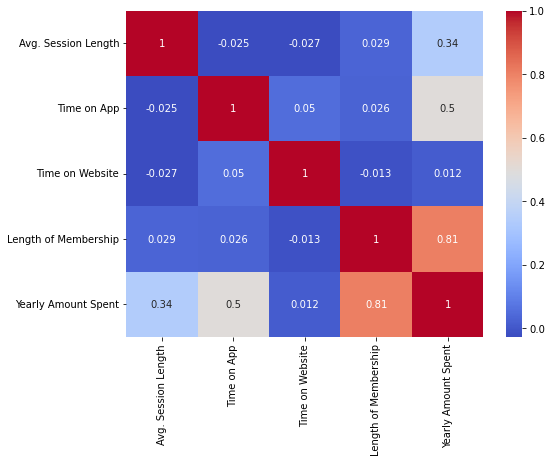

In [49]:
cr=df1.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cr,annot=True,cmap='coolwarm')
plt.show()


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df1[['Time on App','Length of Membership','Yearly Amount Spent']]


# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                      for i in range(len(X.columns))]
print(vif_data)

                feature         VIF
0           Time on App  103.622342
1  Length of Membership   62.435073
2   Yearly Amount Spent  269.278968


### Step_4: Model Development and Evaluation

#### Normality Test

In [51]:
from scipy.stats import shapiro
shapiro(df1['Yearly Amount Spent'])

ShapiroResult(statistic=0.9958285093307495, pvalue=0.2732488214969635)

ShapiroResult(statistic=0.9916672706604004, pvalue=0.01194063015282154)


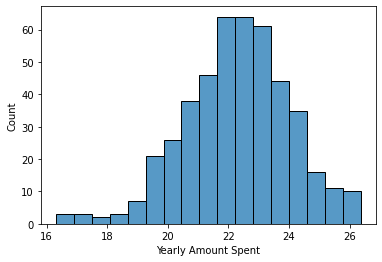

In [52]:
print(shapiro(np.sqrt(df1['Yearly Amount Spent'])))

sns.histplot(np.sqrt(df1['Yearly Amount Spent']))
plt.show()

ShapiroResult(statistic=0.9885292053222656, pvalue=0.0012473680544644594)


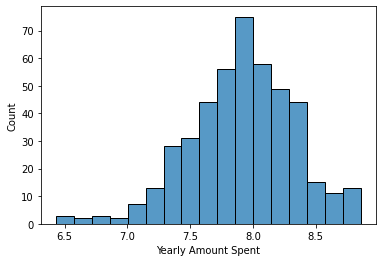

In [53]:
print(shapiro(np.cbrt(df1['Yearly Amount Spent'])))

sns.histplot(np.cbrt(df1['Yearly Amount Spent']))
plt.show()

ShapiroResult(statistic=0.9795386791229248, pvalue=5.190315732761519e-06)


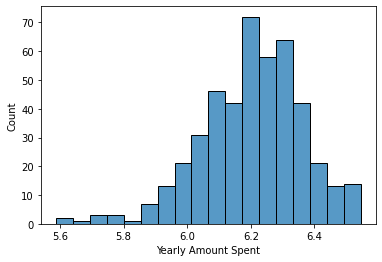

In [54]:
print(shapiro(np.log1p(df1['Yearly Amount Spent'])))

sns.histplot(np.log1p(df1['Yearly Amount Spent']))
plt.show()

ShapiroResult(statistic=0.9503356218338013, pvalue=3.257943914647399e-11)


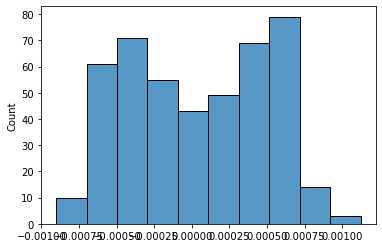

In [55]:
print(shapiro(np.sinc(df1['Yearly Amount Spent'])))

sns.histplot(np.sinc(df1['Yearly Amount Spent']))
plt.show()

### Step_4 Model development
* Seperate x, y
* Split into Train and Test
* run model on Train Data and validate on train and test ( MSE, RMSE, MAE, MAPE)


In [56]:
x=df1[['Time on App','Length of Membership']]
y=df1['Yearly Amount Spent'] 

In [57]:
from sklearn.model_selection import train_test_split  # Train test split
from sklearn.linear_model import LinearRegression     # Model development
from sklearn import metrics  

In [58]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.25, 
                                                  random_state=0)

In [59]:
reg=LinearRegression() # what we have Called ie linearRegression , making it an object reg

# Model made using this code

reg.fit(x_train, y_train)

LinearRegression()

In [60]:
reg.coef_ # these are m values we call them weights here

array([37.86687704, 63.24579762])

In [61]:
reg.intercept_ # this is c values 

-180.5514005843886

In [62]:
print("Train R^2 : ", reg.score(x_train, y_train))

Train R^2 :  0.8758041591878594


In [63]:
print("Test R^2 : ", reg.score(x_test, y_test))

Test R^2 :  0.8641551288330767


#### So R^2 for Train Data is 87.58% and Test Data is 86.41% 

In [64]:
pred_test=reg.predict(x_test)
pred_test

array([454.54437685, 541.15696388, 614.86102387, 465.11697792,
       517.23872354, 520.19078726, 510.32710885, 506.54645067,
       409.86457294, 450.53949065, 462.76184872, 522.79528519,
       532.28886922, 482.10577895, 535.1912322 , 501.52156258,
       470.30869068, 408.61814958, 558.00532452, 538.18889957,
       615.7002774 , 490.77110841, 487.5798024 , 423.12319589,
       543.37857139, 438.89612415, 540.93448272, 515.736014  ,
       351.82494623, 368.0936495 , 577.27827652, 498.26661983,
       402.41033095, 511.98441779, 528.11673106, 413.82488118,
       587.52155951, 401.99943794, 353.64340548, 554.73628633,
       383.31525178, 463.80446141, 257.88485378, 472.39912745,
       515.87373548, 470.02028703, 580.00606468, 457.05811528,
       413.02897726, 583.41311893, 392.85479866, 562.32094409,
       462.69743571, 546.16436591, 582.43901304, 423.07333611,
       506.95129159, 455.06275845, 438.79638374, 448.5898737 ,
       508.47462689, 529.08627616, 615.85480532, 553.29

In [65]:
pred_train=reg.predict(x_train)
pred_train

array([597.51373101, 439.53033617, 488.3946266 , 427.45658231,
       596.63381521, 547.88125071, 639.84319345, 477.63731388,
       503.70523914, 524.21929463, 436.36797015, 699.25592166,
       464.44146536, 505.21988457, 529.82461989, 582.74049976,
       444.94470223, 480.7782801 , 506.94126808, 379.99302706,
       462.85068253, 474.58710517, 479.45294009, 488.52984179,
       521.83048187, 457.11026031, 517.171187  , 471.00911389,
       507.30258452, 546.63775891, 480.22848238, 572.45860177,
       448.69046446, 523.57094224, 543.2587555 , 520.24820493,
       559.28113186, 492.12815467, 421.18100038, 479.71303693,
       502.64864233, 538.74027488, 668.51861058, 536.30249111,
       493.37044086, 462.73116091, 616.8841733 , 479.54179514,
       529.18166364, 532.787818  , 471.32600365, 544.31243325,
       617.9842719 , 532.73889439, 522.20532252, 572.88209713,
       555.02289502, 455.6733332 , 540.75099566, 407.31180106,
       520.88195132, 399.33201701, 491.61013382, 563.88

In [66]:
print("Train MSE", np.mean((pred_train-y_train)**(2)))
print("Train rmse", np.sqrt(np.mean((pred_train-y_train)**(2))))
print("Train MAE",  np.mean(np.abs(pred_train-y_train)))
print("Train MAPE",  np.mean(np.abs((pred_train-y_train)/y_train)))

Train MSE 748.9253795625061
Train rmse 27.36650104712888
Train MAE 22.139422663502067
Train MAPE 0.04556421665878439


In [67]:
print("Test MSE", np.mean((pred_test-y_test)**(2)))
print("Test rmse", np.sqrt(np.mean((pred_test-y_test)**(2))))
print("Test MAE",  np.mean(np.abs(pred_test-y_test)))
print("Test MAPE",  np.mean(np.abs((pred_test-y_test)/y_test)))

Test MSE 791.2404160534865
Test rmse 28.12899600151926
Test MAE 22.641614437688116
Test MAPE 0.04735138179286618


### It means this model is underfit
* test value > train value
